In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
class Perceptron:
    def __init__(self, n_in):
        self.weights = np.zeros(n_in)
        self.bias = 0.0

    def evaluate(self, x):
        return np.dot(self.weights, x.T) + self.bias

    def activation(self, z):
        return np.int32(z > 0)

    def dactivation(self, z):
        return np.ones(z.shape)

    def loss(self, y, _y):
        return np.mean((_y - y) ** 2)

    def dloss(self, y, _y):
        return 2 * (_y - y) / len(y.ravel())

    def train(self, X, y, epochs=5, alpha=0.001, early_stop=False):
        losses = []

        for e in range(epochs):
            z = self.evaluate(X)
            _y = self.activation(z)

            l = np.sum(self.loss(y, _y))
            losses.append(l)

            dl = self.dloss(y, _y)
            db = dl * self.dactivation(_y)

            _dw = db * X.T
            dw = np.sum(_dw, axis=1)

            self.weights -= alpha * dw
            self.bias -= alpha * np.sum(db)

            # do atleast 100 epochs
            if early_stop and e > 100 and losses[e] - losses[e - 1] <= 1e-9:
                print(f"Stopping early at epoch {e}")
                break

        return losses

    def predict(self, x):
        z = self.evaluate(x)
        _y = self.activation(z)

        return _y > 0.5

In [106]:
def _and(x1, x2):
    return int(x1 and x2)


def _or(x1, x2):
    return int(x1 or x2)


def _xor(x1, x2):
    return int(bool(x1) ^ bool(x2))

In [107]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

[False False False  True]


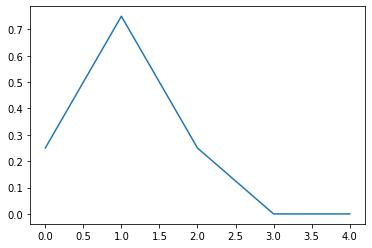

In [108]:
f = _and

y = np.array(list(map(lambda x: f(*x), X)))

p = Perceptron(2)
losses = p.train(X, y)

print(p.predict(X))

plt.plot(losses)
plt.show()

[False  True  True  True]


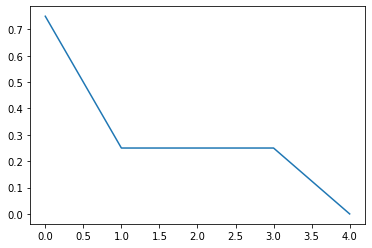

In [109]:
f = _or

y = np.array(list(map(lambda x: f(*x), X)))

p = Perceptron(2)
losses = p.train(X, y)

print(p.predict(X))

plt.plot(losses)
plt.show()

Stopping early at epoch 101
[False False False False]


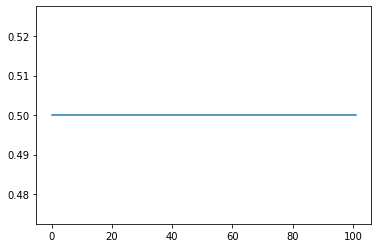

In [112]:
f = _xor

y = np.array(list(map(lambda x: f(*x), X)))

p = Perceptron(2)
losses = p.train(X, y, epochs=10000, early_stop=True)

print(p.predict(X))

plt.plot(losses)
plt.show()